In [1]:
import sympy as sp
# from qiskit import QuantumCircuit
# start the pretty-printer to get nicely typeset math
sp.init_printing()

from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye

from sympy.physics.quantum import Ket
from sympy import sqrt



In [2]:
π = sp.pi
m = sp.Symbol('m', integer=True, positive=True)

expr = (1 + 2*sp.I) * (3 - 4*sp.I)
simplified_expr = sp.simplify(expr)

print("Expression développée :", simplified_expr)

# Extraction des parties réelle et imaginaire
real_part = sp.re(expr)
imag_part = sp.im(expr)

print("Partie réelle :", real_part)
print("Partie imaginaire :", imag_part)

Expression développée : 11 + 2*I
Partie réelle : 11
Partie imaginaire : 2


In [3]:
z_value = 1 + sp.I
r_value = sp.Abs(z_value)  # √2
theta_value = sp.arg(z_value)  # π/4

z_exp_value = r_value * sp.exp(sp.I * theta_value)
print("Forme exponentielle :", z_exp_value)

Forme exponentielle : sqrt(2)*exp(I*pi/4)


In [4]:
ω = sp.exp(2*sp.I*π/m)
ω

In [5]:
sp.Pow(ω,m)

In [6]:
sp.powdenest(sp.Pow(ω,m))


In [7]:
sp.simplify(sp.Pow(ω,m))

In [10]:
somme=0
nb_terme = 4
for i in range (nb_terme):
    #print (i)
    somme = somme + ω**i
#sp.simplify((ω**0+ω**1+ω**2+ω**3+ω**4).subs({m:4}))
#sp.simplify(somme.subs({m:nb_terme-1}))
somme.subs({m:nb_terme})

In [35]:
def qft_matrix(N):
    """Retourne la matrice de la transformée de Fourier quantique de dimension N x N."""
    omega = sp.exp(2 * π * sp.I / N)
    return Matrix(N, N, lambda j, k: omega**(j * k) / sqrt(N))
    
def rqft_matrix(N):
    """Retourne la matrice de la transformée de Fourier quantique inverse de dimension N x N."""
    omega = sp.exp(-2 * π * sp.I / N)
    return Matrix(N, N, lambda j, k: omega**(j * k) / sqrt(N))

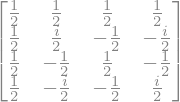

In [47]:
#from sympy import latex
#sp.pprint(qft_matrix(4))

qft_matrix(4)

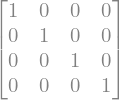

In [49]:
from sympy.physics.quantum.dagger import Dagger
qft_matrix(4)*Dagger(qft_matrix(4))

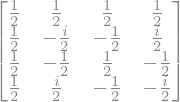

In [40]:
rqft_matrix(4)

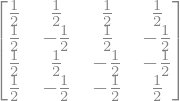

In [44]:
TensorProduct(qft_matrix(2), qft_matrix(2))

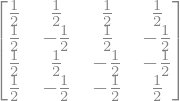

In [43]:
H=sp.Matrix([[1/sp.sqrt(2),1/sp.sqrt(2)], [1/sp.sqrt(2),-1/sp.sqrt(2)]])
TensorProduct(H, H)

In [50]:
from sympy.physics.quantum.qft import QFT

QFT(0,3)


In [2]:

fourier = QFT(0,3).decompose()
fourier

SWAP   ⋅H ⋅C ⎛S ⎞⋅H ⋅C ⎛T ⎞⋅C ⎛S ⎞⋅H 
    0,2  0  0⎝ 1⎠  1  0⎝ 2⎠  1⎝ 2⎠  2

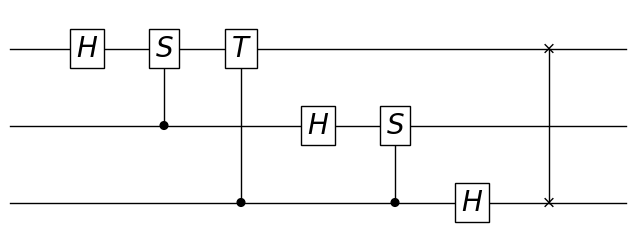

In [3]:
from sympy.physics.quantum.circuitplot import circuit_plot
circuit_plot(fourier, nqubits=3)
# %mkdir -p './images' plt.savefig('./images/fig1-circuitplot-qft.pdf', format='pdf')

SWAP   ⋅SWAP   ⋅H ⋅C ⎛S ⎞⋅H ⋅C ⎛T ⎞⋅C ⎛S ⎞⋅H ⋅C ⎛Rk   ⎞⋅C ⎛T ⎞⋅C ⎛S ⎞⋅H ⋅C ⎛Rk
    1,3     0,4  0  0⎝ 1⎠  1  0⎝ 2⎠  1⎝ 2⎠  2  0⎝  3,4⎠  1⎝ 3⎠  2⎝ 3⎠  3  0⎝  

   ⎞⋅C ⎛Rk   ⎞⋅C ⎛T ⎞⋅C ⎛S ⎞⋅H 
4,5⎠  1⎝  4,4⎠  2⎝ 4⎠  3⎝ 4⎠  4

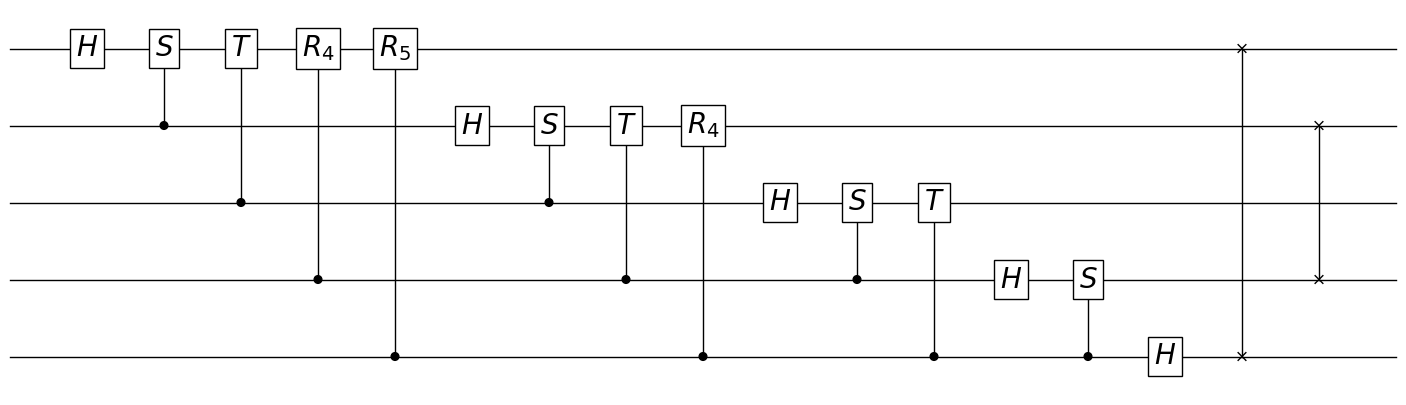

In [8]:
from sympy.physics.quantum.qft import QFT
nqb = 5
fourier = QFT(0,nqb).decompose()
circuit_plot(fourier, nqubits=nqb)
fourier